In [1]:
# 导入模块
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from sklearn.preprocessing import MinMaxScaler
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [2]:
# 读取文件
col_names = [ 'date','time', 'sensor_id', 'val']

homeass_df = pd.read_table('event_result.log', sep="\s+", names=col_names)

homeass_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead.
  after removing the cwd from sys.path.


,date,time,sensor_id,val
0,2007-10-25,15:04:24.590379,T001,21.5
1,2007-10-25,15:04:24.595221,AC01,ON
2,2007-10-25,15:04:24.590379,T002,20.5
3,2007-10-25,15:04:24.590379,T003,20.5
4,2007-10-25,15:13:22.086372,T002,20


In [3]:
# 读取，显示出homeass_df当中全部的设备
homeass_df.sensor_id.unique()

array(['T001', 'AC01', 'T002', 'T003', 'M024', 'L002', 'M025', 'M021',
       'L010', 'M019', 'M018', 'M017', 'M016', 'M015', 'L001', 'L008',
       'M014', 'M008', 'M009', 'M007', 'M006', 'M005', 'M011', 'M010',
       'M001', 'M023', 'M022', 'L003', 'M026', 'M027', 'M028', 'M029',
       'M037', 'L005', 'L007', 'M030', 'DOOR01', 'M036', 'M032', 'M033',
       'M031', 'M013', 'M035', 'M034', 'F002', 'L006', 'M002', 'M003',
       'L009', 'M004', 'M012', 'L004', 'F001', 'D007', 'I003', 'I007',
       'I009', 'I008', 'A001', 'A002', 'L011', 'A003', 'I002', 'I004',
       'I005', 'I006', 'I001', 'M038', 'M039', 'M040', 'M041', 'E001'],
      dtype=object)

In [4]:

all_sensor_id_list = homeass_df.sensor_id.unique().tolist()

In [5]:
# 格式化处理一些事件的状态，我们使用 0 代表关闭的状态， 1 代表打开的状态

homeass_df = homeass_df.applymap(lambda x: '1' if (x=='on' or x=='OPEN') else x)
homeass_df = homeass_df.applymap(lambda x: '0' if (x=='off' or x=='CLOSE') else x)

homeass_df = homeass_df.applymap(lambda x: '1' if (x=='ON' or x=='open') else x)
homeass_df = homeass_df.applymap(lambda x: '0' if (x=='OFF' or x=='close') else x)

In [6]:
# 时间信息的格式 进行一些处理
temp_date_time = homeass_df['date'] + " " +  homeass_df['time']

for i in tqdm(range (temp_date_time.shape[0])):
    if len(temp_date_time.iloc[i].split(':')[-1].split('.')[0]) > 2:
        size_1 = temp_date_time.iloc[i].rfind(':')
        size_2 = temp_date_time.iloc[i].find('.')
        temp_date_time.iloc[i] = temp_date_time.iloc[i][0:size_1] + temp_date_time.iloc[i][size_1:size_2-1] + temp_date_time.iloc[i][size_2:-1]
        print( temp_date_time.iloc[i])

  3%|▎         | 13033/380447 [00:00<00:05, 67265.09it/s]

2007-10-26 15:17:51.66810
2007-10-26 18:53:19.37724
2007-10-26 19:09:59.22672
2007-10-27 09:10:33.09723
2007-10-30 17:45:56.06195
2007-10-30 18:23:11.93685
2007-10-30 20:23:00.83296
2007-10-31 22:35:59.48306
2007-11-01 17:41:11.84523
2007-11-01 18:59:12.81183
2007-11-01 20:08:29.90015
2007-11-01 20:34:15.40856


  7%|▋         | 24950/380447 [00:00<00:05, 62387.67it/s]

2007-11-02 17:01:40.15451
2007-11-02 18:50:11.70982
2007-11-02 22:59:28.73522
2007-11-03 15:51:53.64143
2007-11-03 17:00:03.65539
2007-11-03 17:28:16.07391
2007-11-03 19:27:13.38309
2007-11-03 19:37:49.56079
2007-11-03 19:47:37.89996
2007-11-03 20:15:11.95350
2007-11-03 21:04:33.97130
2007-11-03 21:32:21.9828
2007-11-03 21:44:40.97324
2007-11-03 22:01:44.38112


 10%|▉         | 36616/380447 [00:00<00:06, 56646.41it/s]

2007-11-03 22:05:35.67650
2007-11-03 22:17:42.68561
2007-11-03 22:24:14.14380
2007-11-03 22:41:31.07030
2007-11-04 15:16:06.86681
2007-11-04 18:50:31.94696
2007-11-04 19:07:04.85559
2007-11-04 19:12:33.18114
2007-11-04 19:41:28.97412
2007-11-04 19:44:51.37666
2007-11-04 19:58:21.95511
2007-11-04 20:13:58.34642
2007-11-04 20:30:24.18591
2007-11-04 20:42:39.91577
2007-11-04 21:01:28.52212
2007-11-04 21:05:01.2613
2007-11-05 08:17:14.26015


 12%|█▏        | 47070/380447 [00:00<00:06, 53553.79it/s]

2007-11-05 16:47:29.41685
2007-11-05 17:39:40.54611
2007-11-05 18:03:14.63374
2007-11-05 18:54:43.46854
2007-11-05 19:19:11.58673
2007-11-05 19:42:40.9911
2007-11-06 07:55:11.15777
2007-11-06 18:48:00.99339
2007-11-06 20:25:29.92316
2007-11-06 21:41:24.94361
2007-11-08 18:06:18.20146
2007-11-08 20:05:46.50717
2007-11-08 20:19:40.85318
2007-11-08 20:31:57.08552
2007-11-08 21:24:59.59975
2007-11-09 18:35:14.66175
2007-11-09 18:40:59.82039


 18%|█▊        | 66826/380447 [00:01<00:05, 54168.15it/s]

2007-11-26 17:05:38.31327
2007-11-26 17:35:31.66464
2007-11-26 17:58:39.09207
2007-11-26 18:16:07.24658
2007-11-26 18:31:40.8531
2007-11-26 18:56:02.01914
2007-11-26 19:05:15.8969
2007-11-26 19:15:41.96242
2007-11-26 19:30:49.13317
2007-11-26 19:44:41.16595
2007-11-26 19:58:19.25371
2007-11-26 20:32:13.77341
2007-11-26 21:08:52.97595
2007-11-26 21:26:23.44300
2007-11-26 22:15:37.0122
2007-11-26 22:22:24.31055
2007-11-26 22:49:26.23051
2007-11-27 15:11:45.74031
2007-11-27 15:28:42.88820
2007-11-27 15:39:30.52347
2007-11-27 19:29:23.44419
2007-11-27 20:11:47.97493


 20%|██        | 77570/380447 [00:01<00:06, 49542.35it/s]

2007-11-27 20:34:40.98480
2007-11-27 22:01:45.89898
2007-11-28 18:10:36.5818
2007-11-28 18:26:25.31459
2007-11-28 18:30:33.58011
2007-11-28 18:39:18.04176
2007-11-28 20:25:31.48744
2007-11-29 20:15:56.75014
2007-11-29 20:36:20.61192
2007-11-29 22:54:13.69172
2007-11-30 18:46:31.73628
2007-11-30 19:29:59.40835
2007-11-30 19:38:48.64719
2007-11-30 20:07:07.98500
2007-11-30 20:15:28.11671
2007-11-30 21:19:43.11966
2007-11-30 21:33:53.54008
2007-11-30 21:56:46.78379
2007-11-30 22:11:34.49007
2007-11-30 22:27:17.38566


 23%|██▎       | 88862/380447 [00:01<00:05, 49610.35it/s]

2007-11-30 22:43:29.89224
2007-12-04 19:56:11.96034
2007-12-04 19:58:34.02793
2007-12-06 18:48:59.66903
2007-12-06 22:31:06.02400
2007-12-07 22:13:42.8935
2007-12-07 22:31:58.14028
2007-12-08 19:22:39.28165
2007-12-11 22:00:08.70036
2007-12-12 20:37:55.65394
2007-12-14 09:44:03.45162
2007-12-14 09:57:41.2509
2007-12-28 17:52:35.43285


 26%|██▋       | 100796/380447 [00:01<00:05, 52828.93it/s]

2007-12-28 21:41:08.31276
2007-12-28 22:08:16.15767
2007-12-28 22:11:15.68203
2007-12-28 22:41:22.35566
2007-12-28 22:43:05.32378
2007-12-29 07:32:35.95105
2007-12-29 08:01:06.61275
2007-12-29 08:11:20.35658
2008-01-01 17:13:46.30339
2008-01-01 18:30:24.48399
2008-01-01 19:17:51.40839
2008-01-01 22:47:13.73473
2008-01-02 20:50:37.57667
2008-01-02 21:04:24.52336
2008-01-02 22:45:48.36802
2008-01-03 15:39:27.33428
2008-01-03 15:42:54.96353
2008-01-03 15:54:24.03599


 30%|██▉       | 112258/380447 [00:02<00:04, 53708.44it/s]

2008-01-03 16:12:29.79176
2008-01-03 17:26:07.43898
2008-01-03 18:12:07.93912
2008-01-04 15:05:29.08899
2008-01-04 21:31:18.16486
2008-01-04 22:32:28.21864
2008-01-04 22:48:57.30698
2008-01-05 17:22:07.932
2008-01-05 18:26:24.23736
2008-01-05 19:42:52.96461
2008-01-05 19:48:27.74610
2008-01-05 20:04:05.8415
2008-01-05 20:31:28.31701
2008-01-05 20:46:11.67617
2008-01-05 21:07:55.75535
2008-01-05 21:24:40.69945

 32%|███▏      | 122713/380447 [00:02<00:05, 46923.17it/s]


2008-01-05 21:30:46.39050
2008-01-05 21:45:44.79389
2008-01-05 21:48:07.39055
2008-01-05 22:09:53.61196
2008-01-05 22:26:35.58977
2008-01-06 15:33:25.16197
2008-01-06 15:48:57.12480
2008-01-06 16:13:57.91163
2008-01-07 17:49:52.00590
2008-01-07 18:54:59.15664
2008-01-07 19:40:05.97359
2008-01-07 21:11:44.45092


 35%|███▌      | 133914/380447 [00:02<00:04, 50276.31it/s]

2008-01-08 17:02:29.06036
2008-01-08 21:59:14.36005
2008-01-09 18:37:17.10758
2008-01-09 19:32:12.86899
2008-01-10 09:50:28.83207
2008-01-10 22:13:49.51762
2008-01-11 19:24:37.85617
2008-01-11 19:28:02.63996
2008-01-11 19:38:04.62023
2008-01-11 19:41:43.33025
2008-01-11 20:05:27.68018
2008-01-11 20:29:34.07607
2008-01-11 20:31:31.24936


 38%|███▊      | 144250/380447 [00:02<00:05, 46801.23it/s]

2008-01-11 20:39:05.93873
2008-01-11 20:41:25.14551
2008-01-11 21:14:58.62260
2008-01-11 21:51:11.96139
2008-01-12 09:45:50.92518
2008-01-18 18:11:07.47294
2008-01-18 18:13:07.10935
2008-01-18 18:15:46.31280
2008-01-18 18:24:33.47954
2008-01-18 18:30:27.24246
2008-01-18 21:51:43.32414
2008-01-19 15:52:46.41812
2008-01-19 19:29:55.35853
2008-01-19 19:45:53.70279


 44%|████▍     | 166971/380447 [00:03<00:03, 63135.69it/s]

2008-01-19 21:44:09.17535
2008-01-19 22:44:33.9701
2008-01-22 22:19:23.11897
2008-01-23 16:17:23.37020
2008-01-24 15:34:06.9496
2008-01-25 17:29:15.32424
2008-01-25 17:56:22.4847


 48%|████▊     | 181657/380447 [00:03<00:03, 62694.06it/s]

2008-01-25 22:23:43.82347
2008-01-26 16:52:31.11904
2008-01-26 16:55:10.70839
2008-01-26 16:59:00.43480
2008-01-26 17:35:19.90448
2008-01-26 17:42:31.88343
2008-01-26 17:46:10.88930
2008-01-26 20:02:24.07821
2008-01-26 21:17:15.44872


 53%|█████▎    | 203506/380447 [00:03<00:02, 69477.76it/s]

2008-01-26 22:20:57.51871
2008-01-27 09:10:59.19029
2008-01-27 09:21:48.99347
2008-01-27 21:09:52.52147
2008-01-27 22:53:49.36042
2008-01-28 15:14:45.31892
2008-01-28 16:48:13.80596


 57%|█████▋    | 217887/380447 [00:03<00:02, 67247.15it/s]

2008-01-28 17:43:27.13031
2008-01-28 17:55:42.32071
2008-01-28 17:58:50.96715
2008-01-28 18:14:42.13274
2008-01-28 18:17:38.71345
2008-01-28 18:36:22.13256
2008-01-28 19:38:49.93524
2008-01-28 20:41:04.5481
2008-01-28 21:57:15.18106
2008-02-09 15:07:57.5505
2008-02-09 15:09:32.80849
2008-02-09 15:13:05.44614
2008-02-10 15:39:09.49797
2008-02-10 16:37:04.20096
2008-02-10 17:26:05.69408
2008-02-11 17:59:22.58621


 61%|██████    | 231204/380447 [00:04<00:02, 61913.10it/s]

2008-02-11 18:09:51.39893
2008-02-11 20:23:46.96299
2008-02-11 20:41:00.41113
2008-02-11 20:55:44.4823
2008-02-11 22:23:44.05616
2008-02-12 19:20:45.23473
2008-02-13 09:55:52.07042
2008-02-13 19:36:07.14763
2008-02-13 20:20:56.20152
2008-02-13 21:21:09.53560
2008-02-13 22:17:13.46833
2008-02-14 21:35:29.20645
2008-02-14 21:54:13.96017
2008-02-16 16:14:19.81642
2008-02-16 16:54:23.46785
2008-02-16 17:08:12.37375
2008-02-16 21:29:11.47246
2008-02-16 22:15:08.46918
2008-02-16 22:47:47.98504


 64%|██████▍   | 243835/380447 [00:04<00:02, 59528.34it/s]

2008-02-18 19:52:19.26679
2008-02-18 19:53:24.17632
2008-02-19 22:35:19.561
2008-02-20 18:31:02.01008
2008-02-20 20:10:34.54756
2008-02-21 09:35:35.45016
2008-02-21 20:36:40.40941
2008-02-21 21:18:34.04172
2008-02-21 22:13:57.47462
2008-02-21 22:23:44.07918
2008-02-21 22:30:42.16069
2008-02-21 22:49:34.55101
2008-02-22 07:25:46.44257
2008-02-22 08:14:55.56409

 67%|██████▋   | 255999/380447 [00:04<00:02, 56216.90it/s]


2008-02-22 09:05:40.02646
2008-02-22 09:33:23.14865
2008-02-22 09:43:59.0673
2008-02-22 15:52:32.10885
2008-02-22 16:09:40.33921
2008-02-22 16:18:49.34143
2008-02-22 16:32:26.53944
2008-02-22 16:44:14.50153
2008-02-22 16:49:31.51645
2008-02-22 19:01:00.53910
2008-02-22 19:57:55.47411
2008-02-22 20:02:14.82017
2008-02-22 20:19:03.63262
2008-02-22 20:40:31.97119
2008-02-22 21:03:04.55328


 71%|███████   | 271062/380447 [00:04<00:01, 63862.64it/s]

2008-02-23 09:39:44.4359
2008-02-23 18:05:01.21490
2008-02-23 18:38:56.83294
2008-02-23 18:43:02.50176
2008-02-23 19:04:29.30627
2008-02-23 19:05:56.60559
2008-02-23 19:13:12.75291
2008-02-23 19:32:50.96697
2008-02-23 20:21:07.0164


 75%|███████▍  | 283598/380447 [00:04<00:01, 56364.19it/s]

2008-02-24 08:13:00.67178
2008-02-24 08:29:21.00895
2008-02-24 08:45:49.49392
2008-02-24 08:51:07.96223
2008-02-24 09:20:44.9321
2008-02-24 09:36:33.82440
2008-02-25 08:07:44.84086
2008-02-26 08:55:35.39129
2008-02-26 16:48:06.35338
2008-02-27 20:51:31.56395
2008-02-27 21:18:30.93225
2008-02-28 19:51:41.28983
2008-02-28 19:55:19.54420
2008-02-28 20:00:42.51243
2008-02-28 20:05:04.09379
2008-02-28 20:27:45.70873


 77%|███████▋  | 294634/380447 [00:05<00:01, 45510.85it/s]

2008-02-28 22:14:12.83436
2008-02-28 22:27:27.64696
2008-02-28 22:58:37.54193
2008-03-01 07:56:37.37706
2008-03-01 16:10:00.33336
2008-03-01 17:34:01.56954
2008-03-01 17:38:40.54123
2008-03-02 06:46:10.42512
2008-03-02 16:09:19.56662
2008-03-02 16:22:48.46804
2008-03-02 17:56:39.50
2008-03-02 18:22:59.77161
2008-03-02 19:56:31.04023
2008-03-02 20:40:31.08076
2008-03-02 20:49:00.88013
2008-03-03 09:24:31.33354
2008-03-04 15:57:09.5158


 80%|████████  | 304802/380447 [00:05<00:01, 44950.28it/s]

2008-03-04 17:15:46.44943
2008-03-04 17:31:50.20568
2008-03-04 17:37:50.10347
2008-03-04 17:52:56.50623
2008-03-04 17:55:09.30842
2008-03-04 18:00:38.32449
2008-03-04 18:09:21.90087
2008-03-04 19:11:52.837
2008-03-05 19:01:20.27562
2008-03-05 19:19:33.97770
2008-03-06 09:16:55.21920
2008-03-06 19:44:52.72094
2008-03-06 20:24:00.0358
2008-03-06 21:47:29.49927
2008-03-06 22:01:03.94601
2008-03-06 22:19:17.56344
2008-03-06 22:47:02.49193
2008-03-10 15:52:51.46740


 83%|████████▎ | 316739/380447 [00:05<00:01, 51507.18it/s]

2008-03-10 20:47:00.79841
2008-03-10 21:27:55.12823
2008-03-10 21:41:49.37231
2008-03-11 18:34:24.35351
2008-03-12 16:29:26.28157
2008-03-12 16:54:44.1830
2008-03-16 19:42:47.01110
2008-03-16 20:57:02.4847
2008-03-20 16:34:45.47975
2008-03-20 16:58:43.34381
2008-03-20 17:35:31.21720
2008-03-20 19:11:23.42899
2008-03-20 20:13:35.59205


 86%|████████▋ | 328882/380447 [00:05<00:00, 53870.81it/s]

2008-03-22 15:04:21.03470
2008-03-23 08:55:31.84947
2008-03-23 17:22:29.18257
2008-03-23 17:36:57.07579
2008-03-23 19:14:46.34981
2008-03-23 19:28:52.57636
2008-03-23 19:52:16.77207
2008-03-28 16:14:38.53769
2008-03-30 19:04:01.3618
2008-04-04 15:17:46.6698
2008-04-04 18:09:12.47576


 89%|████████▉ | 340138/380447 [00:06<00:00, 51918.56it/s]

2008-04-06 17:52:35.02106
2008-04-06 18:03:47.56792
2008-04-06 18:08:01.39761
2008-04-06 18:11:23.54756
2008-04-06 18:23:55.20843
2008-04-06 20:41:37.89412
2008-04-06 20:52:49.05903
2008-04-08 15:59:26.72527
2008-04-08 19:00:47.80661
2008-04-09 09:58:46.80642
2008-04-10 09:31:17.52508
2008-04-10 09:39:03.31944
2008-04-10 15:49:11.05121
2008-04-10 15:52:50.76626
2008-04-10 18:26:03.49357
2008-04-10 18:47:17.26384
2008-04-10 22:01:00.3553


 92%|█████████▏| 350345/380447 [00:06<00:00, 46358.41it/s]

2008-04-11 21:03:21.87909
2008-04-11 21:04:48.88825
2008-04-11 21:56:40.13939
2008-04-11 22:24:27.94226
2008-04-12 15:52:06.05248
2008-04-12 16:03:26.10191
2008-04-12 17:19:52.32265
2008-04-12 17:29:05.68376
2008-04-12 18:00:58.44515
2008-04-12 18:19:39.06471
2008-04-12 18:22:15.17388
2008-04-12 18:49:31.3357
2008-04-12 18:52:25.93154
2008-04-12 19:14:05.94049
2008-04-12 19:19:25.40992
2008-04-12 19:25:38.9798
2008-04-12 19:47:20.88733


 95%|█████████▌| 362173/380447 [00:06<00:00, 50700.48it/s]

2008-04-13 08:24:04.24937
2008-04-13 08:41:44.32693
2008-04-14 09:31:29.79627
2008-04-15 15:25:06.90917
2008-04-15 16:07:24.32511
2008-04-15 17:06:05.98156
2008-04-15 17:09:40.3224
2008-04-15 17:20:40.96580
2008-04-15 22:35:05.86227
2008-04-17 09:41:09.49178
2008-04-17 09:55:37.48016
2008-04-18 15:05:42.34235
2008-04-25 21:11:26.80208


100%|██████████| 380447/380447 [00:06<00:00, 55886.53it/s]

2008-04-30 17:19:35.79723
2008-05-08 09:39:57.43266
2008-05-12 21:22:48.81165
2008-05-13 19:31:39.16483
2008-05-13 19:38:13.43846
2008-05-13 20:05:09.720
2008-05-14 20:40:36.74020


In [7]:
homeass_df['datetime'] = pd.to_datetime(temp_date_time )

del homeass_df['date']
del homeass_df['time']

In [8]:
# 显示出所有设备
target_list = ['T001', 'AC01', 'T002', 'T003', 'M024', 'L002', 'M025', 'M021',
       'L010', 'M019', 'M018', 'M017', 'M016', 'M015', 'L001', 'L008',
       'M014', 'M008', 'M009', 'M007', 'M006', 'M005', 'M011', 'M010',
       'M001', 'M023', 'M022', 'L003', 'M026', 'M027', 'M028', 'M029',
       'M037', 'L005', 'L007', 'M030', 'DOOR01', 'M036', 'M032', 'M033',
       'M031', 'M013', 'M035', 'M034', 'F002', 'L006', 'M002', 'M003',
       'L009', 'M004', 'M012', 'L004', 'F001', 'D007', 'I003', 'I007',
       'I009', 'I008', 'A001', 'A002', 'L011', 'A003', 'I002', 'I004',
       'I005', 'I006', 'I001', 'M038', 'M039', 'M040', 'M041', 'E001']

In [9]:
homeass_df.head()

,sensor_id,val,datetime
0,T001,21.5,2007-10-25 15:04:24.590379
1,AC01,1,2007-10-25 15:04:24.595221
2,T002,20.5,2007-10-25 15:04:24.590379
3,T003,20.5,2007-10-25 15:04:24.590379
4,T002,20,2007-10-25 15:13:22.086372


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


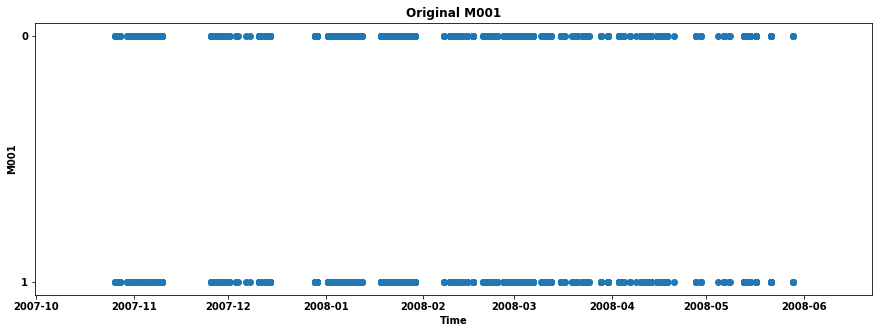

In [10]:
# 以两个设备为例， 画出设备状态随事件变化的示意图
# PLOT ORIGINAL M
plt.figure(figsize=(15,5))
plt.scatter(homeass_df[homeass_df['sensor_id'] == "M001"].datetime, 
            homeass_df[homeass_df['sensor_id'] == "M001"].val)
plt.title('Original M001')
plt.xlabel('Time')
plt.ylabel('M001')
plt.show()

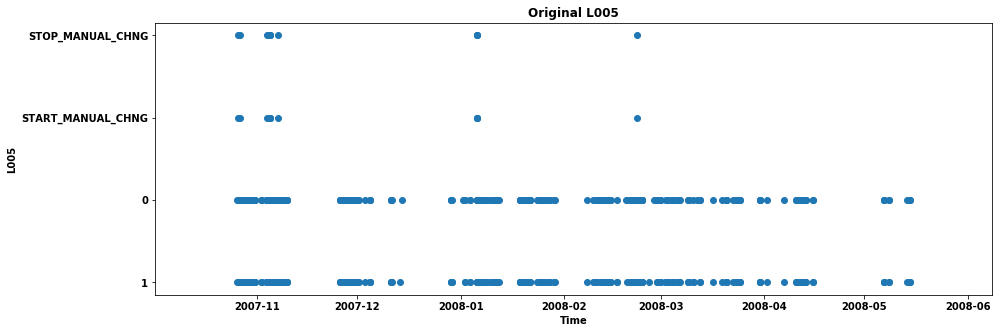

In [11]:
# PLOT ORIGINAL M
plt.figure(figsize=(15,5))
plt.scatter(homeass_df[homeass_df['sensor_id'] == "L005"].datetime, 
            homeass_df[homeass_df['sensor_id'] == "L005"].val)
plt.title('Original L005')
plt.xlabel('Time')
plt.ylabel('L005')
plt.show()

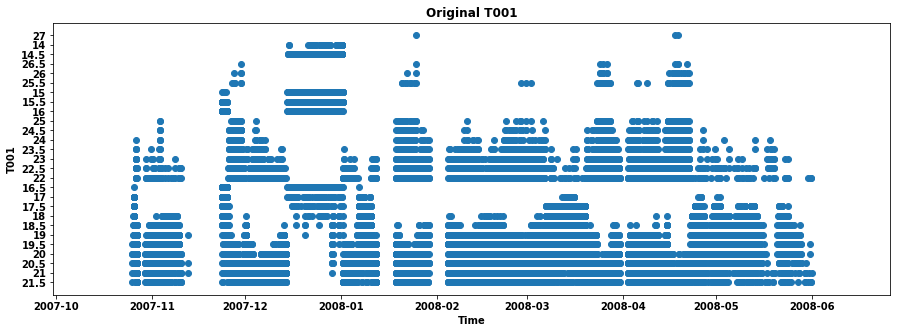

In [12]:
# PLOT ORIGINAL T
plt.figure(figsize=(15,5))
plt.scatter(homeass_df[homeass_df['sensor_id'] == "T001"].datetime, 
            homeass_df[homeass_df['sensor_id'] == "T001"].val)
plt.title('Original T001')
plt.xlabel('Time')
plt.ylabel('T001')
plt.show()

In [16]:
homeass_df['event_name'] = homeass_df['sensor_id'] + "_" +  homeass_df['val']

In [17]:
# 统计并显示全部事件出现的次数, 共计3895条
event_count_series = homeass_df.event_name.value_counts()
event_count_series = event_count_series.sort_index()

target_sensor_id_list = homeass_df.sensor_id.unique()
b_target_sensor_id_list = [x  for x in target_sensor_id_list if ("M0" in x or "D0" in x)]

homeass_df.event_name.value_counts().sort_index()

A001_0.204612      1
A001_0.680948      1
A001_0.685245      1
A001_0.769074      1
A001_1.15752       1
A001_1.16517       1
A001_1.18775       1
A001_1.34557       1
A001_1.50307       1
A001_1.52448       1
A001_1.5269        1
A001_1.75518       1
A001_1.76956       1
A001_1.79354       1
A001_1.92417       2
A001_1.92425       1
A001_1.92433       1
A001_1.94886       1
A001_1.95948       1
A001_1.99323       1
A001_2.07464       1
A001_2.07769       1
A001_2.07894       1
A001_2.08003       3
A001_2.08433       2
A001_2.08519       1
A001_2.08753       1
A001_2.08949       1
A001_2.08956       1
A001_2.08964       1
                ... 
T002_30.5          1
T002_31            1
T003_15            3
T003_15.5         88
T003_16          323
T003_16.5        463
T003_17          708
T003_17.5        934
T003_18          870
T003_18.5        779
T003_19          544
T003_19.5        354
T003_20          197
T003_20.5        112
T003_21           61
T003_21.5         38
T003_22      

In [18]:
homeass_df.event_name.value_counts()

L001_1            31860
L001_0            31860
M010_1            13260
M010_0            13260
M006_1             9168
M006_0             9168
M017_1             7773
M017_0             7773
M013_1             6026
M013_0             6026
M016_1             5457
M016_0             5457
M009_0             4838
M009_1             4838
M035_1             4739
M035_0             4739
M005_1             4349
M005_0             4349
M007_0             4125
M007_1             4125
M015_0             4052
M015_1             4052
M008_0             3993
M008_1             3993
M014_1             3663
M014_0             3663
M011_0             3473
M011_1             3473
M032_1             3256
M032_0             3256
                  ...  
A003_0.582939         1
A002_0.510672         1
A002_0.406686         1
A002_0.514617         1
A001_2.98919          1
A001_3.03083          1
A003_0.267153         1
A003_0.0420319        1
A002_0.21637          1
A001_3.04637          1
A001_3.02598    

In [19]:
# 标注event
event2id = {event:i for i, event in enumerate(homeass_df.event_name.unique().tolist())}


In [20]:
event2id

{'T001_21.5': 0,
 'AC01_1': 1,
 'T002_20.5': 2,
 'T003_20.5': 3,
 'T002_20': 4,
 'T001_21': 5,
 'T001_20.5': 6,
 'T003_20': 7,
 'T001_20': 8,
 'AC01_0': 9,
 'T002_19.5': 10,
 'T001_19.5': 11,
 'M024_1': 12,
 'L002_1': 13,
 'M025_1': 14,
 'M021_1': 15,
 'M025_0': 16,
 'L010_1': 17,
 'M021_0': 18,
 'M019_1': 19,
 'M024_0': 20,
 'M018_1': 21,
 'M017_1': 22,
 'M018_0': 23,
 'M019_0': 24,
 'M016_1': 25,
 'M015_1': 26,
 'L001_1': 27,
 'M017_0': 28,
 'L008_1': 29,
 'M014_1': 30,
 'M016_0': 31,
 'M014_0': 32,
 'M008_1': 33,
 'M009_1': 34,
 'M015_0': 35,
 'M008_0': 36,
 'M009_0': 37,
 'L001_0': 38,
 'M007_1': 39,
 'M006_1': 40,
 'M005_1': 41,
 'M007_0': 42,
 'M006_0': 43,
 'M005_0': 44,
 'T002_22': 45,
 'T002_23': 46,
 'T003_19.5': 47,
 'T002_23.5': 48,
 'T002_24': 49,
 'T002_24.5': 50,
 'T002_25': 51,
 'M011_1': 52,
 'M011_0': 53,
 'M010_1': 54,
 'M010_0': 55,
 'T002_25.5': 56,
 'M001_1': 57,
 'M023_1': 58,
 'M022_1': 59,
 'M023_0': 60,
 'M001_0': 61,
 'M022_0': 62,
 'L003_1': 63,
 'M026_1': 6

In [21]:
# 事件全部用于统计
train_homeass_df = homeass_df 


In [22]:
def get_softmax(x_array):
    
    tmp=np.max(x_array)
    x_array -= tmp
    x_array = np.exp(x_array)
    tmp = np.sum(x_array)
    x_array /= tmp
    
    return x_array
 

In [23]:
# 定义函数将频数转化为概率
def get_simple_pro(x_array):
    
    sum_num = np.sum(x_array)
     
    x_array /= sum_num
    
    return x_array

In [35]:
event_id_list = train_homeass_df.event_name.tolist()
for i in range(len(event_id_list)):
    
    event_id_list[i] = event2id[event_id_list[i]]

In [36]:
train_homeass_df['event_id'] = pd.Series(event_id_list)

In [37]:
train_homeass_df

,sensor_id,val,datetime,event_name,event_id
0,T001,21.5,2007-10-25 15:04:24.590379,T001_21.5,0
1,AC01,1,2007-10-25 15:04:24.595221,AC01_1,1
2,T002,20.5,2007-10-25 15:04:24.590379,T002_20.5,2
3,T003,20.5,2007-10-25 15:04:24.590379,T003_20.5,3
4,T002,20,2007-10-25 15:13:22.086372,T002_20,4
5,T001,21,2007-10-25 15:17:52.026502,T001_21,5
6,T002,20.5,2007-10-25 15:22:21.057274,T002_20.5,2
7,T002,20,2007-10-25 15:26:50.272292,T002_20,4
8,T001,20.5,2007-10-25 16:07:12.391723,T001_20.5,6
9,T003,20,2007-10-25 17:01:01.824001,T003_20,7


In [38]:
# train_homeass_df 稳定排序, 使得所有的相同时间戳事件按照被记录的顺序来排列
train_homeass_df.sort_values(by = ['datetime'] , ascending=[True], kind='mergesort', inplace=True)

In [39]:
# 用于统计的输入样例
train_homeass_df

,sensor_id,val,datetime,event_name,event_id
0,T001,21.5,2007-10-25 15:04:24.590379,T001_21.5,0
2,T002,20.5,2007-10-25 15:04:24.590379,T002_20.5,2
3,T003,20.5,2007-10-25 15:04:24.590379,T003_20.5,3
1,AC01,1,2007-10-25 15:04:24.595221,AC01_1,1
4,T002,20,2007-10-25 15:13:22.086372,T002_20,4
5,T001,21,2007-10-25 15:17:52.026502,T001_21,5
6,T002,20.5,2007-10-25 15:22:21.057274,T002_20.5,2
7,T002,20,2007-10-25 15:26:50.272292,T002_20,4
8,T001,20.5,2007-10-25 16:07:12.391723,T001_20.5,6
9,T003,20,2007-10-25 17:01:01.824001,T003_20,7


In [40]:
# 生成概率转移矩阵的过程
event_trans = np.zeros((len(event2id), len(event2id)))

nrow = train_homeass_df.shape[0]

for i in tqdm(range(nrow-1)): 
        
    pre_id = train_homeass_df.iloc[i].event_id
    now_id = train_homeass_df.iloc[i+1].event_id
    event_trans[pre_id][now_id] += 1


  8%|▊         | 30232/380446 [00:14<02:31, 2306.01it/s]


 16%|█▌        | 61817/380446 [00:28<02:14, 2366.12it/s]


 25%|██▌       | 95720/380446 [00:42<01:57, 2422.18it/s]


 33%|███▎      | 124543/380446 [00:57<02:08, 1995.11it/s]


 40%|████      | 152326/380446 [01:11<01:43, 2200.10it/s]


 48%|████▊     | 183449/380446 [01:25<01:20, 2451.07it/s]


 57%|█████▋    | 217112/380446 [01:39<01:04, 2525.35it/s]


 66%|██████▌   | 250557/380446 [01:53<00:54, 2404.70it/s]


 74%|███████▍  | 282866/380446 [02:07<00:47, 2066.17it/s]


 83%|████████▎ | 314428/380446 [02:20<00:27, 2400.01it/s]


 91%|█████████ | 346418/380446 [02:34<00:14, 2346.16it/s]


 99%|█████████▉| 378298/380446 [02:48<00:00, 2166.89it/s]


100%|██████████| 380446/380446 [02:49<00:00, 2242.18it/s]

In [41]:
## 得到最终转移概率矩阵
for i in range(event_trans.shape[0]):
    
    event_trans[i] = get_simple_pro(event_trans[i])

In [128]:
# 存为numpy 是为了下次方面直接调用
np.save("event_trans_pro.npy", event_trans) 
event_trans = np.load("event_trans_pro.npy")

In [42]:
# 查看概率取值的示例， 第一个下标代表事件i， 第二个下标代表事件j,而输出的值就是转移概率p(i->j)
event_trans[84][85]

0.4763157894736842

In [43]:
event_trans

array([[0.        , 0.06507304, 0.10292165, ..., 0.        , 0.        ,
        0.        ],
       [0.08995816, 0.        , 0.00732218, ..., 0.        , 0.        ,
        0.        ],
       [0.0880829 , 0.02901554, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [44]:
event_trans[84][85]

0.4763157894736842

In [45]:
event_trans[85][84]

0.4441887226697353

In [46]:
event_trans[10][1]

0.19213226909920184

In [47]:
event_trans[1][10]

0.0198744769874477

In [48]:
event_trans[1][4]

0.015690376569037656

In [49]:
event_trans[4][1]

0.09834834834834835